In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
data = pd.read_csv(r"C:\Users\Predator\Downloads\google-data.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
data.shape

(1259, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [30]:
datafeed = data[['Date','Close']].copy()

In [31]:
datafeed.rename(columns = {'Date':'ds', 'Close':'y'}, inplace = True)

In [32]:
datafeed

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [34]:
model.fit(datafeed)

13:44:16 - cmdstanpy - INFO - Chain [1] start processing
13:44:17 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
from prophet.diagnostics import cross_validation, performance_metrics
from bayes_opt import BayesianOptimization

In [62]:
def best_param_search(changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(changepoint_prior_scale = changepoint_prior_scale, seasonality_prior_scale = seasonality_prior_scale).fit(datafeed)
    cross_val = cross_validation(model, horizon = '100 days', parallel = 'processes')
    perf_m = performance_metrics(cross_val, rolling_window = 1)
    rmse = (perf_m['rmse'].values[0])
    return -rmse

In [59]:
parameters = {'changepoint_prior_scale':[0.001, 0.5],
              'seasonality_prior_scale':[0.01,10]}

In [64]:
optimizer = BayesianOptimization(
    best_param_search,
    pbounds = parameters,
    random_state = 42
)

In [65]:
optimizer.maximize()

|   iter    |  target   | change... | season... |
-------------------------------------------------


14:30:59 - cmdstanpy - INFO - Chain [1] start processing
14:31:00 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -72.45    | 0.1879    | 9.508     |


14:31:15 - cmdstanpy - INFO - Chain [1] start processing
14:31:17 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -77.18    | 0.3663    | 5.991     |


14:31:31 - cmdstanpy - INFO - Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -68.71    | 0.07885   | 1.568     |


14:31:45 - cmdstanpy - INFO - Chain [1] start processing
14:31:45 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -70.61    | 0.02998   | 8.663     |


14:31:57 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -76.95    | 0.301     | 7.084     |


14:32:13 - cmdstanpy - INFO - Chain [1] start processing
14:32:13 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -72.92    | 0.004897  | 0.3255    |


14:32:24 - cmdstanpy - INFO - Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -79.26    | 0.5       | 2.48      |


14:32:41 - cmdstanpy - INFO - Chain [1] start processing
14:32:41 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -68.95    | 0.04265   | 1.401     |


14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -85.84    | 0.5       | 1.284     |


14:33:09 - cmdstanpy - INFO - Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -74.7     | 0.001     | 1.811     |


14:33:21 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -70.1     | 0.09711   | 8.93      |


14:33:35 - cmdstanpy - INFO - Chain [1] start processing
14:33:36 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -74.54    | 0.2215    | 8.245     |


14:33:52 - cmdstanpy - INFO - Chain [1] start processing
14:33:53 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -78.48    | 0.326     | 8.745     |


14:34:09 - cmdstanpy - INFO - Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -69.48    | 0.0867    | 1.561     |


14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -72.63    | 0.01038   | 1.549     |


14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -71.29    | 0.02645   | 8.665     |


14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -69.29    | 0.08482   | 8.632     |


14:34:58 - cmdstanpy - INFO - Chain [1] start processing
14:34:59 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -70.02    | 0.08699   | 1.635     |


14:35:12 - cmdstanpy - INFO - Chain [1] start processing
14:35:12 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -69.9     | 0.03056   | 8.579     |


14:35:24 - cmdstanpy - INFO - Chain [1] start processing
14:35:25 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -69.22    | 0.09382   | 1.344     |


14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -73.04    | 0.01089   | 1.325     |


14:35:49 - cmdstanpy - INFO - Chain [1] start processing
14:35:50 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -70.31    | 0.1417    | 1.41      |


14:36:03 - cmdstanpy - INFO - Chain [1] start processing
14:36:05 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -79.55    | 0.4098    | 6.811     |


14:36:20 - cmdstanpy - INFO - Chain [1] start processing
14:36:21 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -70.65    | 0.1812    | 1.313     |


14:36:36 - cmdstanpy - INFO - Chain [1] start processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -69.97    | 0.1094    | 8.716     |


14:36:50 - cmdstanpy - INFO - Chain [1] start processing
14:36:51 - cmdstanpy - INFO - Chain [1] done processing


| 26        | -70.28    | 0.1118    | 8.832     |


14:37:04 - cmdstanpy - INFO - Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing


| 27        | -72.25    | 0.007666  | 8.868     |


14:37:14 - cmdstanpy - INFO - Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing


| 28        | -71.38    | 0.1905    | 8.909     |


14:37:31 - cmdstanpy - INFO - Chain [1] start processing
14:37:32 - cmdstanpy - INFO - Chain [1] done processing


| 29        | -69.05    | 0.08766   | 1.344     |


14:37:45 - cmdstanpy - INFO - Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing


| 30        | -70.35    | 0.1222    | 9.046     |


In [66]:
optimizer.max

{'target': -68.71255682756593,
 'params': {'changepoint_prior_scale': 0.07885330158077582,
  'seasonality_prior_scale': 1.5683852581586646}}

In [67]:
model = Prophet(changepoint_prior_scale = 0.0788533015807758, seasonality_prior_scale = 1.5683852581586646)

In [68]:
model.fit(datafeed)

14:39:51 - cmdstanpy - INFO - Chain [1] start processing
14:39:52 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = model.make_future_dataframe(periods= 100, freq='D', include_history = False)

In [70]:
future = model.predict()

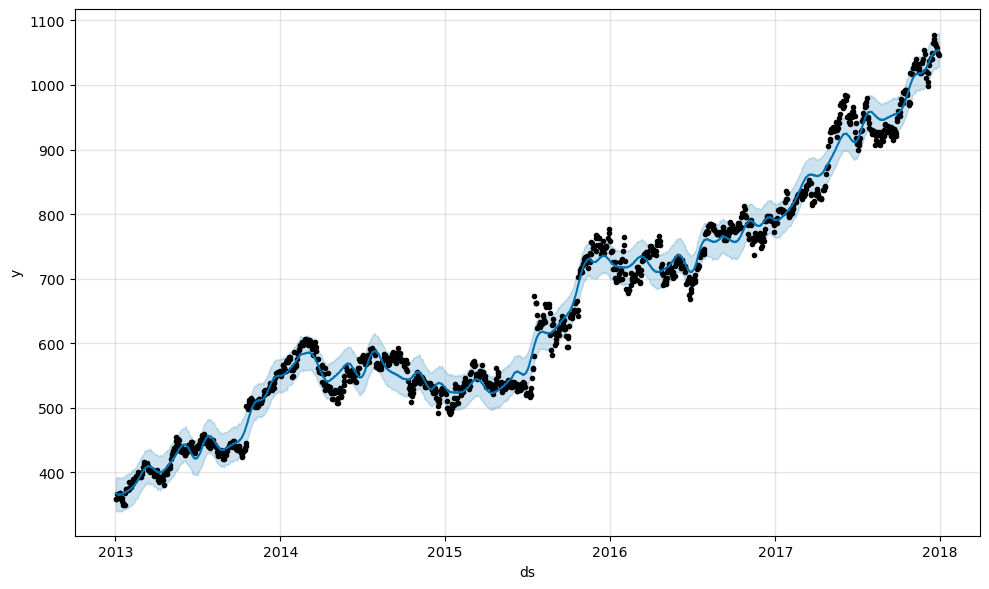

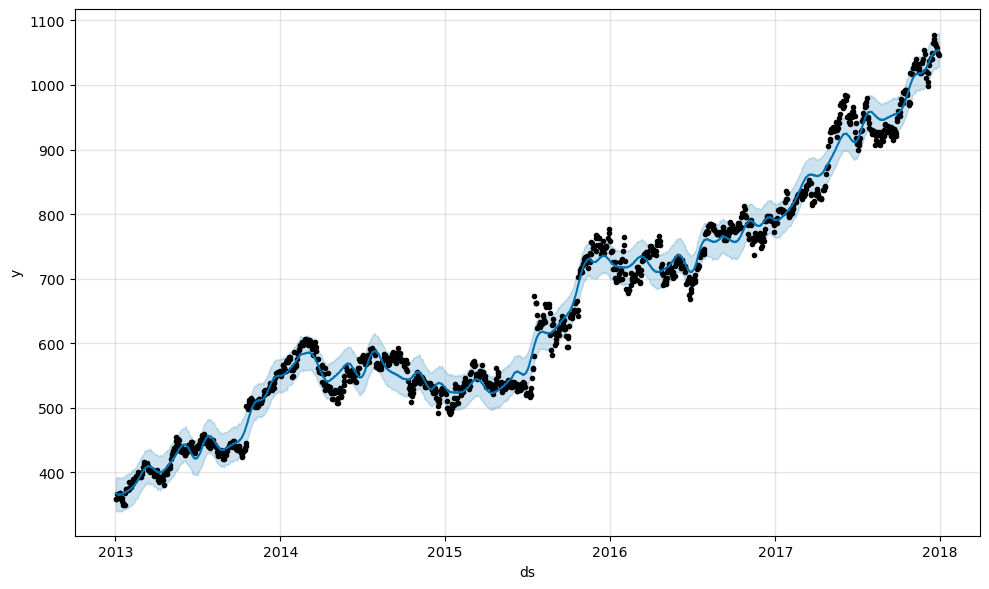

In [73]:
model.plot(future)